# Agent environment with bitflipping actions, and random target

## Objective
The state space is $S=\{0,1\}^n$ for fixed $n$. The objective is to find a policy $\pi_t(s)$ (where the policy is dependent on $t \in S$) such that we are able to reach $t$ by flipping bits. The actions are represented by $A=\{0,\cdots,n-1\}$ representing which bit to be flipped. The corresponding DQN would be $Q: (s,t,a) \in S \times S \times A \rightarrow \mathbb{R}$.

## Neural network model details
 * Input: $\mathbb{R}^n \times \mathbb{R}^n$ vector representing the bit sequence (e.g. $00011 \sim (0, 0, 0, 1, 1)$) of state and goal.
 * Output: $\mathbb{R}^{n}$ vector of the $Q$-values
    * The index corresponds to integer $\geq 0$ representing the index of the bit being flipped
    * So $\text{model}(s,t)[a]$ will be the $Q$-value
 * Architecture: UFVA, Handcrafted Neural Network with high inductive bias

## Training method
Simple DQN with replay
   * Exploration step -> update Q network -> validation step

**Exploration step**
We initialize 16 agents starting at random starting states (for each agent). The actions will be according to the DQN agent, and with probability $\epsilon$, a random action will be picked uniformly. We add this to the experience buffer. The episode has at most $n$ steps. We also use HER to store the buffer (update goal to some randomly picked state in the trajectory).

**Update Q network**
Update the DQN to match Bellman's equation using a randomly sampled batch size ($=256$), and this is done with gradient descent.

**Validation step**
Access the performance of the learnt policy. Initialize 1024 agents, and let the agent fully decide the actions (we do not replace actions with probability $\epsilon$ with uniform distribution). Since this is the validation step, this should not interfere with the training process, and the experience buffer/model weights won't be updated.


## Notes
For an optimal agent, $E[\text{steps}] = \frac{1}{2^n}\sum_{k=0}^n \dbinom{n}{k}k = \frac{n}{2}$. We expect the average number of steps to be close to $\frac{n}{2}$ if an optimal agent is chosen.

In [1]:
import torch
import src.runtime as runtime
from src.runtime import train_DQN_agent

device = torch.device("cuda:0")

### Testing $n=5$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 5
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 102/3000 [00:06<02:39, 18.14it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 1.00, Avg steps to success: 2.46, Loss: 0.001168


  7%|▋         | 203/3000 [00:12<02:39, 17.59it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 1.00, Avg steps to success: 2.47, Loss: 0.000130


  7%|▋         | 203/3000 [00:12<02:46, 16.81it/s]


Early stopping at episode 203
Episode: 203/3000, Epsilon: 0.36041096100926434, Success rate: 1.00, Avg steps to success: 2.53, Loss: 0.000122


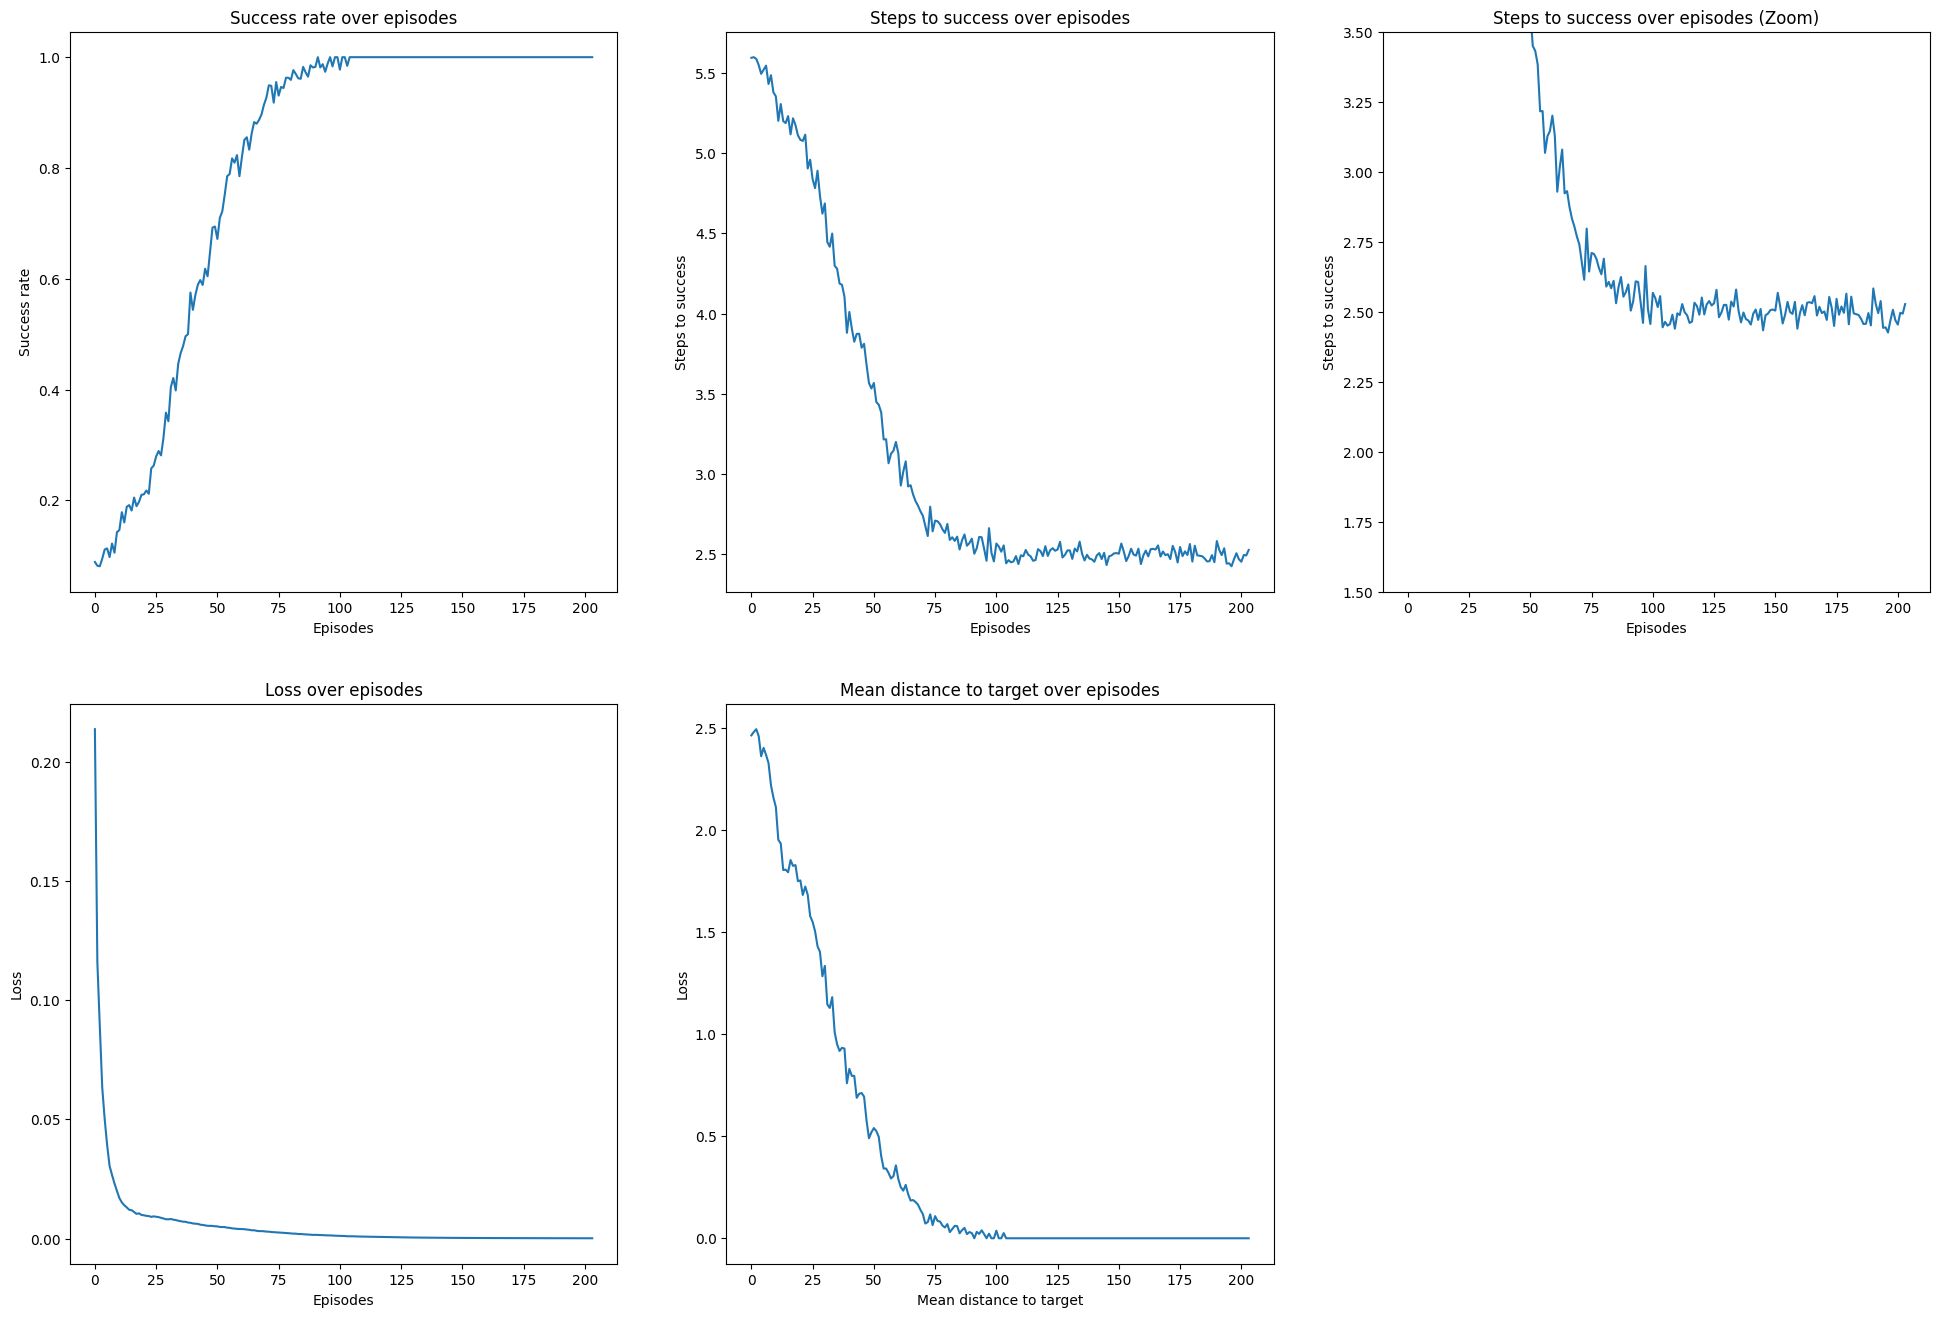

In [2]:
agent, env = train_DQN_agent(5, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=10$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 10
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 101/3000 [00:11<06:12,  7.78it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.09, Avg steps to success: 10.41, Loss: 0.002473


  7%|▋         | 201/3000 [00:22<07:12,  6.47it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.47, Avg steps to success: 8.14, Loss: 0.002289


 10%|█         | 301/3000 [00:38<07:28,  6.02it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.98, Avg steps to success: 5.15, Loss: 0.002273


 13%|█▎        | 401/3000 [00:53<06:40,  6.49it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 1.00, Avg steps to success: 4.93, Loss: 0.001002


 16%|█▋        | 494/3000 [01:07<05:39,  7.37it/s]


Early stopping at episode 494
Episode: 494/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 4.96, Loss: 0.000549


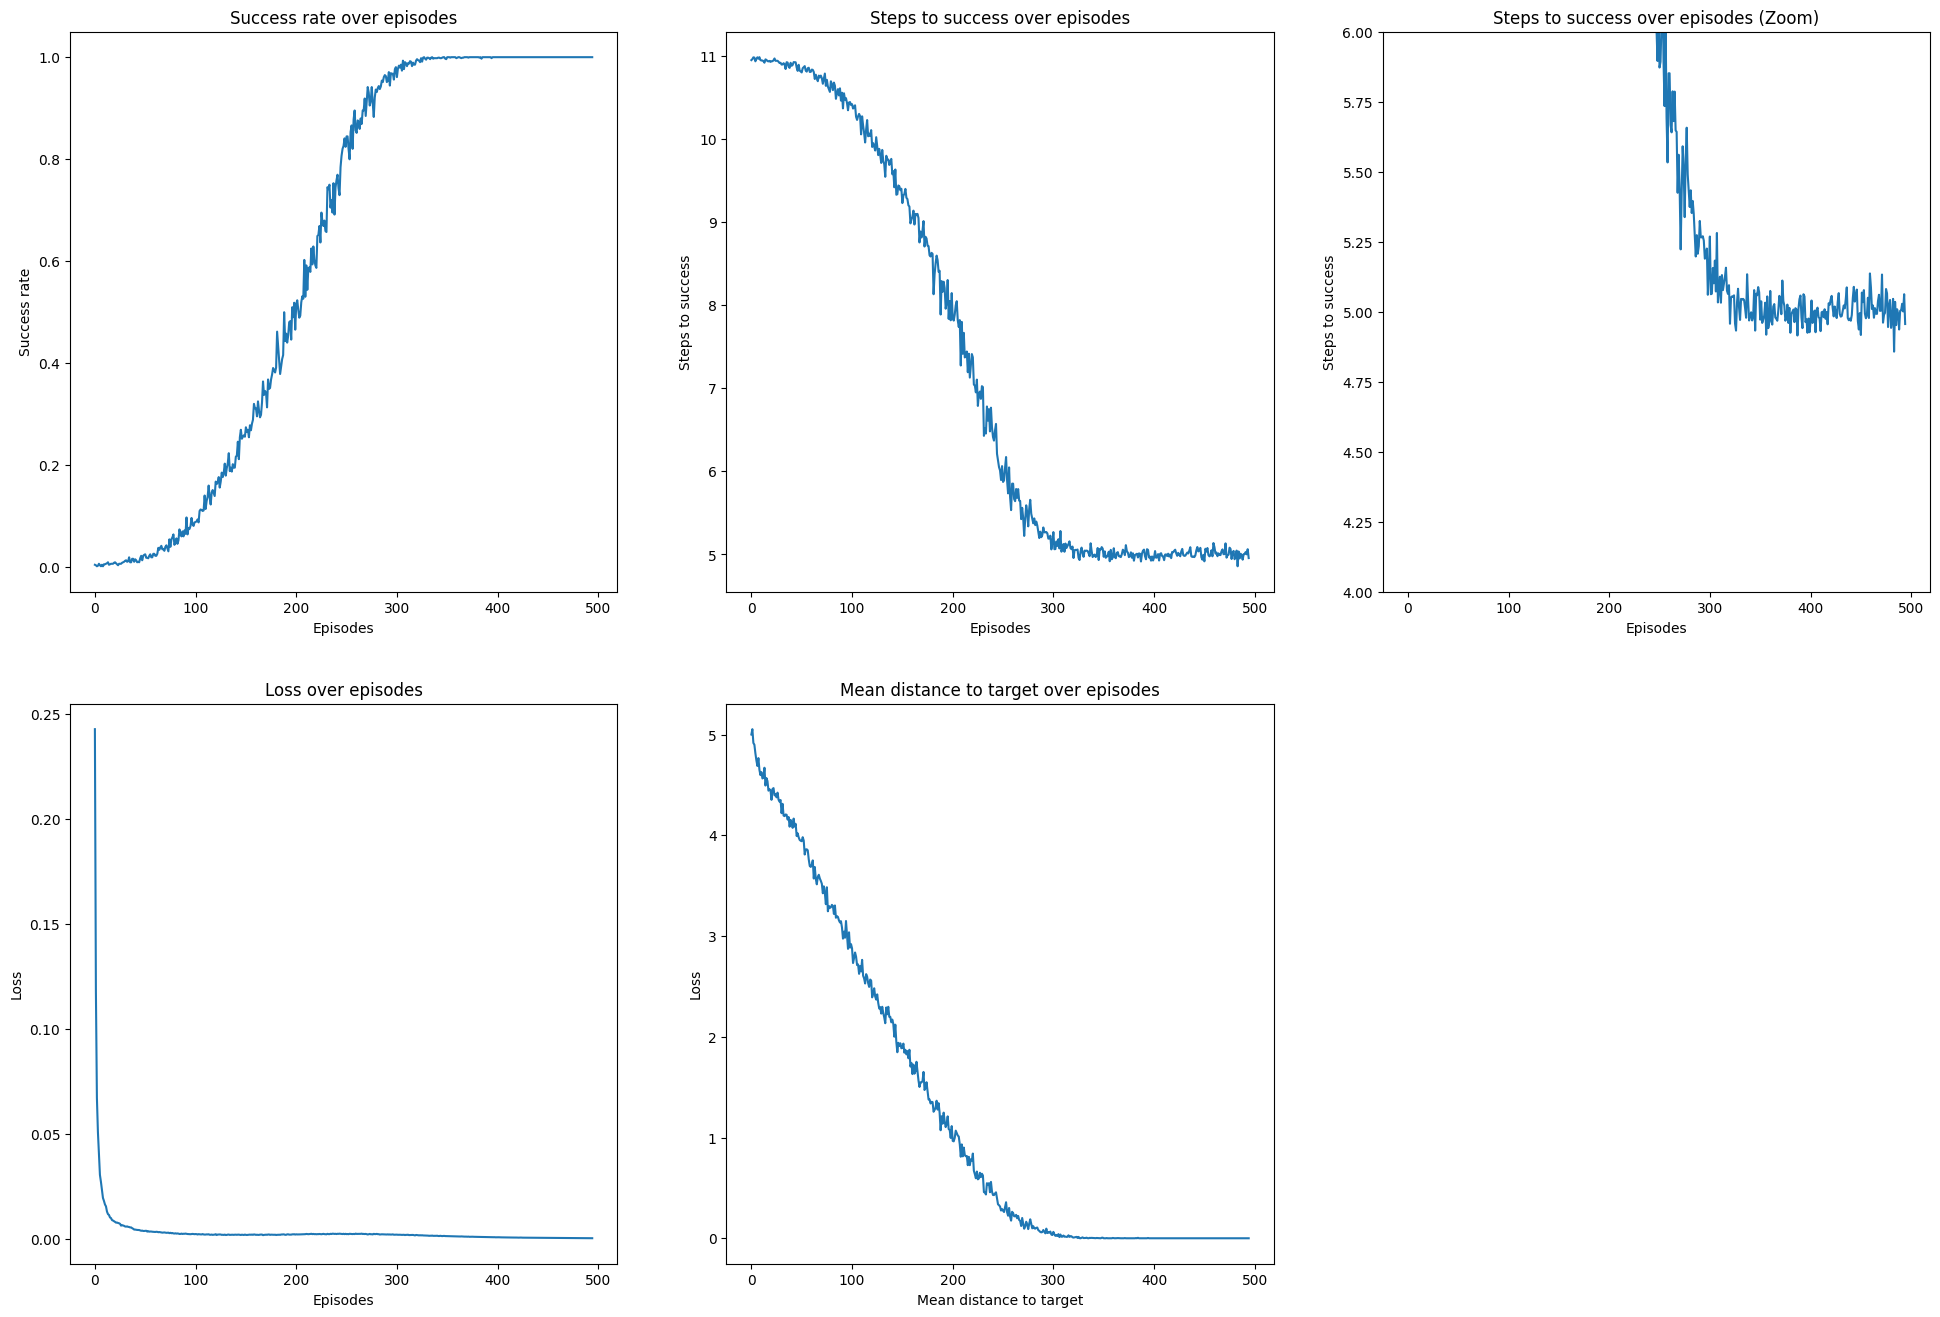

In [3]:
agent, env = train_DQN_agent(10, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=15$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 15
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 101/3000 [00:15<06:47,  7.12it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 15.99, Loss: 0.001832


  7%|▋         | 200/3000 [00:39<12:25,  3.76it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 15.97, Loss: 0.001572


 10%|█         | 300/3000 [01:09<14:49,  3.04it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.04, Avg steps to success: 15.66, Loss: 0.001950


 13%|█▎        | 400/3000 [01:36<12:11,  3.55it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.13, Avg steps to success: 14.84, Loss: 0.002296


 17%|█▋        | 500/3000 [02:03<09:21,  4.45it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.26, Avg steps to success: 13.70, Loss: 0.002524


 20%|██        | 600/3000 [02:27<10:25,  3.84it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 0.48, Avg steps to success: 11.80, Loss: 0.002688


 23%|██▎       | 700/3000 [02:52<09:40,  3.96it/s]

Episode: 699/3000, Epsilon: 0.1, Success rate: 0.69, Avg steps to success: 10.00, Loss: 0.002232


 27%|██▋       | 800/3000 [03:18<09:03,  4.05it/s]

Episode: 799/3000, Epsilon: 0.1, Success rate: 0.83, Avg steps to success: 8.96, Loss: 0.001863


 30%|███       | 900/3000 [03:42<07:18,  4.78it/s]

Episode: 899/3000, Epsilon: 0.1, Success rate: 0.96, Avg steps to success: 7.97, Loss: 0.001243


 33%|███▎      | 1000/3000 [04:07<07:50,  4.25it/s]

Episode: 999/3000, Epsilon: 0.1, Success rate: 0.98, Avg steps to success: 7.67, Loss: 0.000993


 37%|███▋      | 1100/3000 [04:31<07:19,  4.32it/s]

Episode: 1099/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.55, Loss: 0.000830


 40%|████      | 1200/3000 [04:54<07:10,  4.18it/s]

Episode: 1199/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.60, Loss: 0.000718


 43%|████▎     | 1300/3000 [05:19<06:31,  4.34it/s]

Episode: 1299/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.58, Loss: 0.000688


 47%|████▋     | 1400/3000 [05:42<06:52,  3.88it/s]

Episode: 1399/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.41, Loss: 0.000658


 50%|█████     | 1500/3000 [06:08<06:36,  3.79it/s]

Episode: 1499/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.48, Loss: 0.000618


 53%|█████▎    | 1600/3000 [06:33<05:37,  4.14it/s]

Episode: 1599/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.51, Loss: 0.000616


 57%|█████▋    | 1700/3000 [06:56<05:28,  3.95it/s]

Episode: 1699/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.54, Loss: 0.000612


 60%|██████    | 1800/3000 [07:22<05:25,  3.69it/s]

Episode: 1799/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.55, Loss: 0.000596


 63%|██████▎   | 1900/3000 [07:47<04:51,  3.78it/s]

Episode: 1899/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.52, Loss: 0.000578


 67%|██████▋   | 2000/3000 [08:11<04:09,  4.01it/s]

Episode: 1999/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.49, Loss: 0.000546


 70%|███████   | 2100/3000 [08:36<03:49,  3.93it/s]

Episode: 2099/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.59, Loss: 0.000576


 73%|███████▎  | 2200/3000 [09:00<03:17,  4.06it/s]

Episode: 2199/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.47, Loss: 0.000566


 77%|███████▋  | 2301/3000 [09:25<02:30,  4.65it/s]

Episode: 2299/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.53, Loss: 0.000562


 80%|████████  | 2400/3000 [09:45<02:31,  3.95it/s]

Episode: 2399/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.51, Loss: 0.000536


 83%|████████▎ | 2500/3000 [10:10<02:07,  3.92it/s]

Episode: 2499/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.50, Loss: 0.000542


 86%|████████▋ | 2590/3000 [10:32<01:40,  4.09it/s]


Early stopping at episode 2590
Episode: 2590/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 7.55, Loss: 0.000547


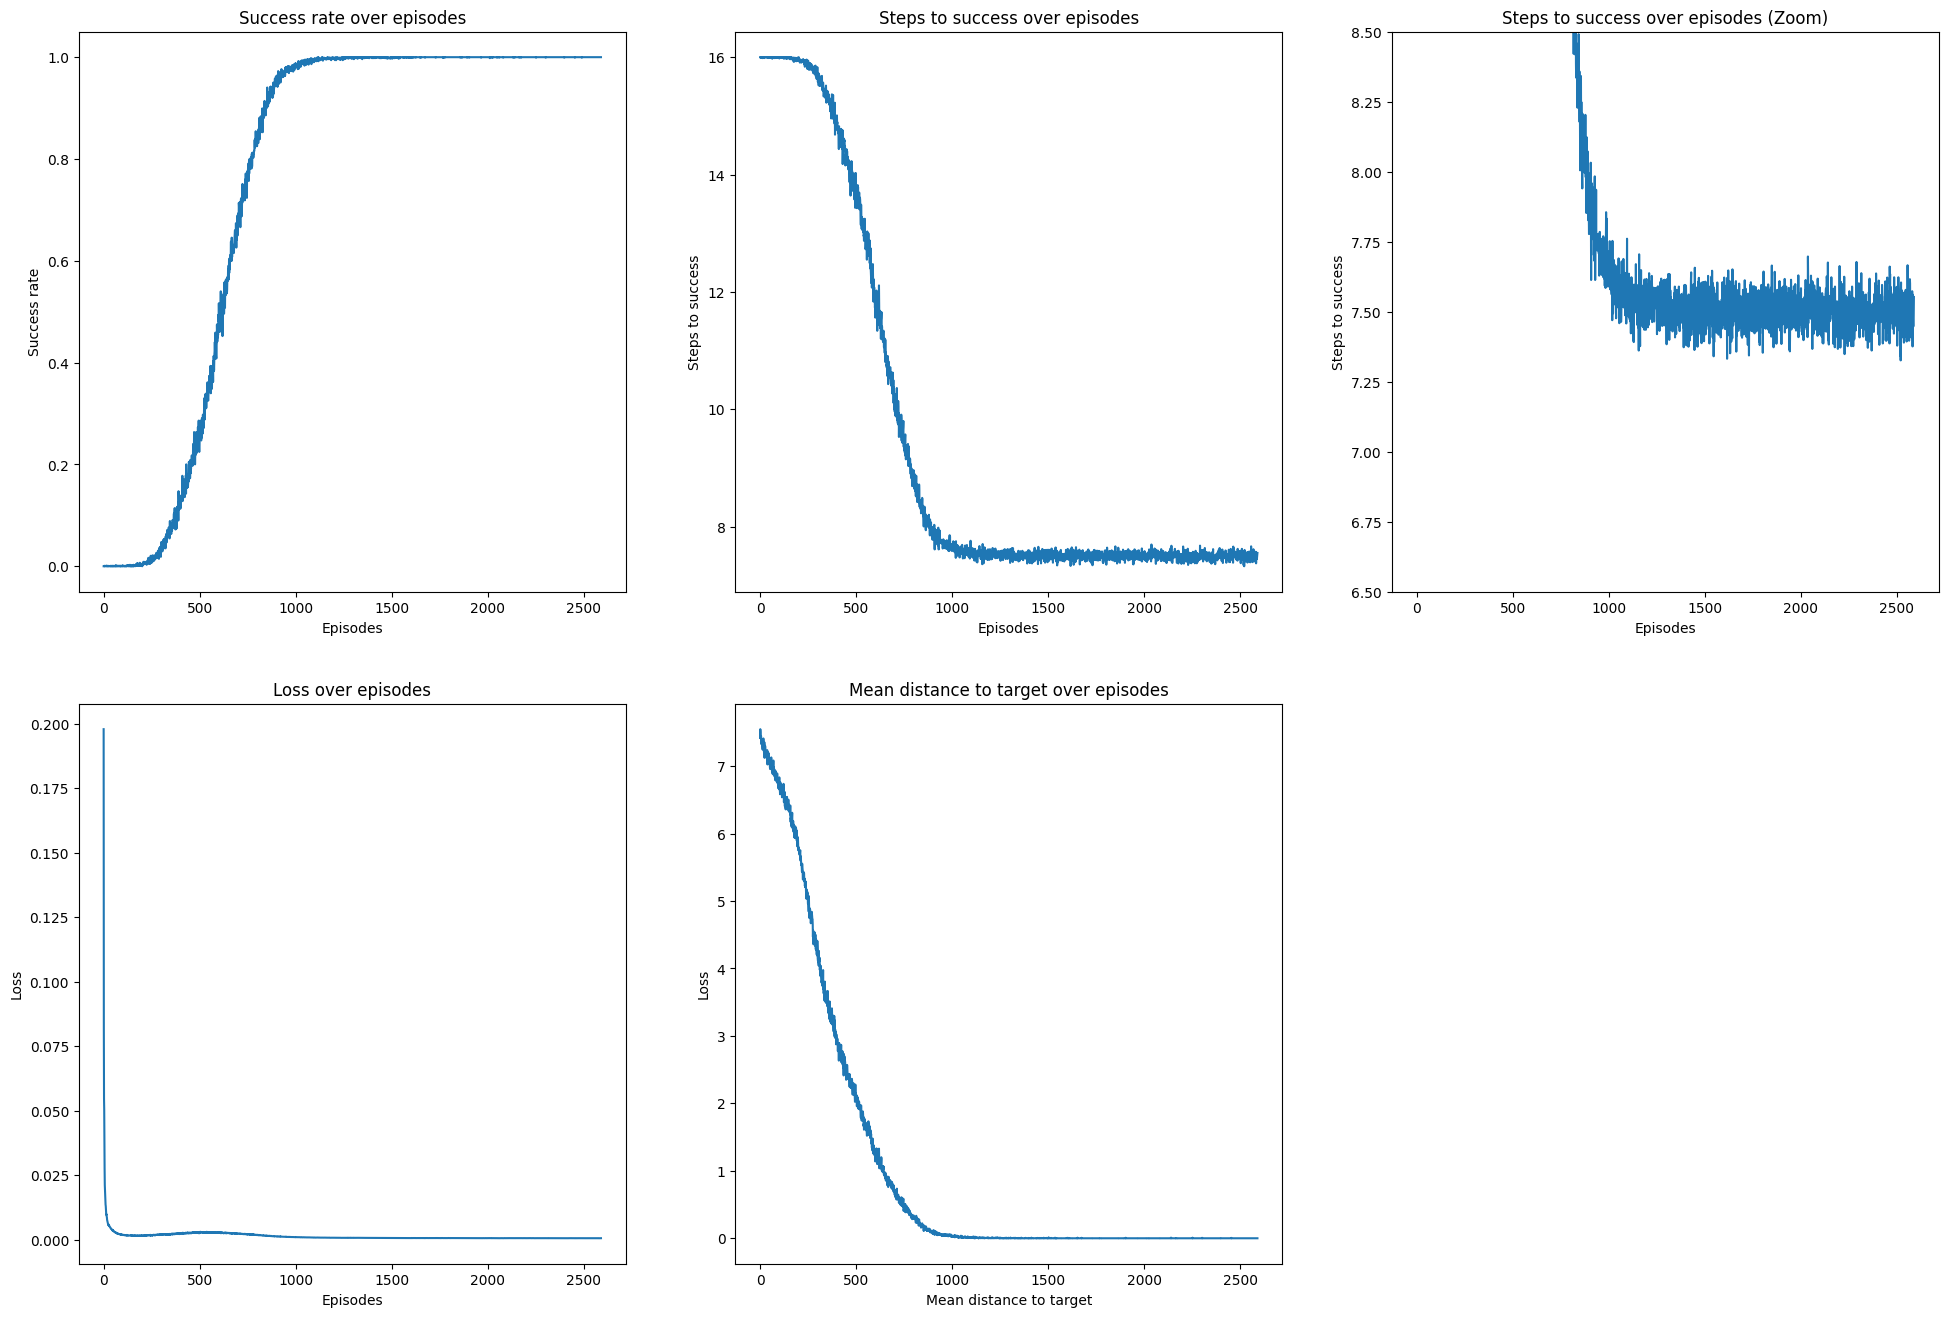

In [4]:
agent, env = train_DQN_agent(15, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=20$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 20
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 100/3000 [00:21<19:19,  2.50it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.001916


  7%|▋         | 200/3000 [01:01<19:27,  2.40it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.001193


 10%|█         | 300/3000 [01:39<17:46,  2.53it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.001213


 13%|█▎        | 400/3000 [02:18<18:10,  2.38it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.00, Avg steps to success: 20.99, Loss: 0.001144


 17%|█▋        | 500/3000 [02:56<14:55,  2.79it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 20.96, Loss: 0.001213


 20%|██        | 600/3000 [03:36<16:49,  2.38it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 0.01, Avg steps to success: 20.85, Loss: 0.001230


 23%|██▎       | 700/3000 [04:16<13:34,  2.82it/s]

Episode: 699/3000, Epsilon: 0.1, Success rate: 0.02, Avg steps to success: 20.82, Loss: 0.001221


 27%|██▋       | 800/3000 [04:54<14:41,  2.49it/s]

Episode: 799/3000, Epsilon: 0.1, Success rate: 0.01, Avg steps to success: 20.83, Loss: 0.001311


 30%|███       | 900/3000 [05:32<12:50,  2.73it/s]

Episode: 899/3000, Epsilon: 0.1, Success rate: 0.02, Avg steps to success: 20.75, Loss: 0.001360


 33%|███▎      | 1000/3000 [06:10<11:43,  2.84it/s]

Episode: 999/3000, Epsilon: 0.1, Success rate: 0.03, Avg steps to success: 20.69, Loss: 0.001440


 37%|███▋      | 1100/3000 [06:49<13:10,  2.40it/s]

Episode: 1099/3000, Epsilon: 0.1, Success rate: 0.02, Avg steps to success: 20.79, Loss: 0.001640


 40%|████      | 1200/3000 [07:29<13:04,  2.30it/s]

Episode: 1199/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.60, Loss: 0.001439


 43%|████▎     | 1300/3000 [08:07<11:29,  2.47it/s]

Episode: 1299/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.54, Loss: 0.001528


 47%|████▋     | 1400/3000 [08:44<09:54,  2.69it/s]

Episode: 1399/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.58, Loss: 0.001546


 50%|█████     | 1500/3000 [09:21<09:23,  2.66it/s]

Episode: 1499/3000, Epsilon: 0.1, Success rate: 0.03, Avg steps to success: 20.65, Loss: 0.001695


 53%|█████▎    | 1600/3000 [10:02<09:49,  2.37it/s]

Episode: 1599/3000, Epsilon: 0.1, Success rate: 0.03, Avg steps to success: 20.67, Loss: 0.001693


 57%|█████▋    | 1700/3000 [10:40<08:08,  2.66it/s]

Episode: 1699/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.55, Loss: 0.001666


 60%|██████    | 1800/3000 [11:19<08:05,  2.47it/s]

Episode: 1799/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.59, Loss: 0.001678


 63%|██████▎   | 1900/3000 [11:59<07:48,  2.35it/s]

Episode: 1899/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.59, Loss: 0.001754


 67%|██████▋   | 2000/3000 [12:38<07:29,  2.22it/s]

Episode: 1999/3000, Epsilon: 0.1, Success rate: 0.05, Avg steps to success: 20.45, Loss: 0.001816


 70%|███████   | 2100/3000 [13:18<05:51,  2.56it/s]

Episode: 2099/3000, Epsilon: 0.1, Success rate: 0.06, Avg steps to success: 20.33, Loss: 0.001843


 73%|███████▎  | 2200/3000 [13:52<04:08,  3.22it/s]

Episode: 2199/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 20.50, Loss: 0.001797


 77%|███████▋  | 2300/3000 [14:24<03:33,  3.28it/s]

Episode: 2299/3000, Epsilon: 0.1, Success rate: 0.05, Avg steps to success: 20.40, Loss: 0.001850


 80%|████████  | 2400/3000 [14:57<03:12,  3.12it/s]

Episode: 2399/3000, Epsilon: 0.1, Success rate: 0.06, Avg steps to success: 20.36, Loss: 0.001826


 83%|████████▎ | 2500/3000 [15:32<02:56,  2.83it/s]

Episode: 2499/3000, Epsilon: 0.1, Success rate: 0.06, Avg steps to success: 20.36, Loss: 0.001775


 87%|████████▋ | 2600/3000 [16:06<02:26,  2.72it/s]

Episode: 2599/3000, Epsilon: 0.1, Success rate: 0.07, Avg steps to success: 20.16, Loss: 0.001764


 90%|█████████ | 2700/3000 [16:41<01:41,  2.95it/s]

Episode: 2699/3000, Epsilon: 0.1, Success rate: 0.06, Avg steps to success: 20.24, Loss: 0.001704


 93%|█████████▎| 2800/3000 [17:15<01:11,  2.81it/s]

Episode: 2799/3000, Epsilon: 0.1, Success rate: 0.07, Avg steps to success: 20.20, Loss: 0.001995


 97%|█████████▋| 2900/3000 [17:50<00:33,  2.98it/s]

Episode: 2899/3000, Epsilon: 0.1, Success rate: 0.06, Avg steps to success: 20.31, Loss: 0.001965


100%|██████████| 3000/3000 [18:23<00:00,  2.72it/s]

Episode: 2999/3000, Epsilon: 0.1, Success rate: 0.06, Avg steps to success: 20.34, Loss: 0.001993


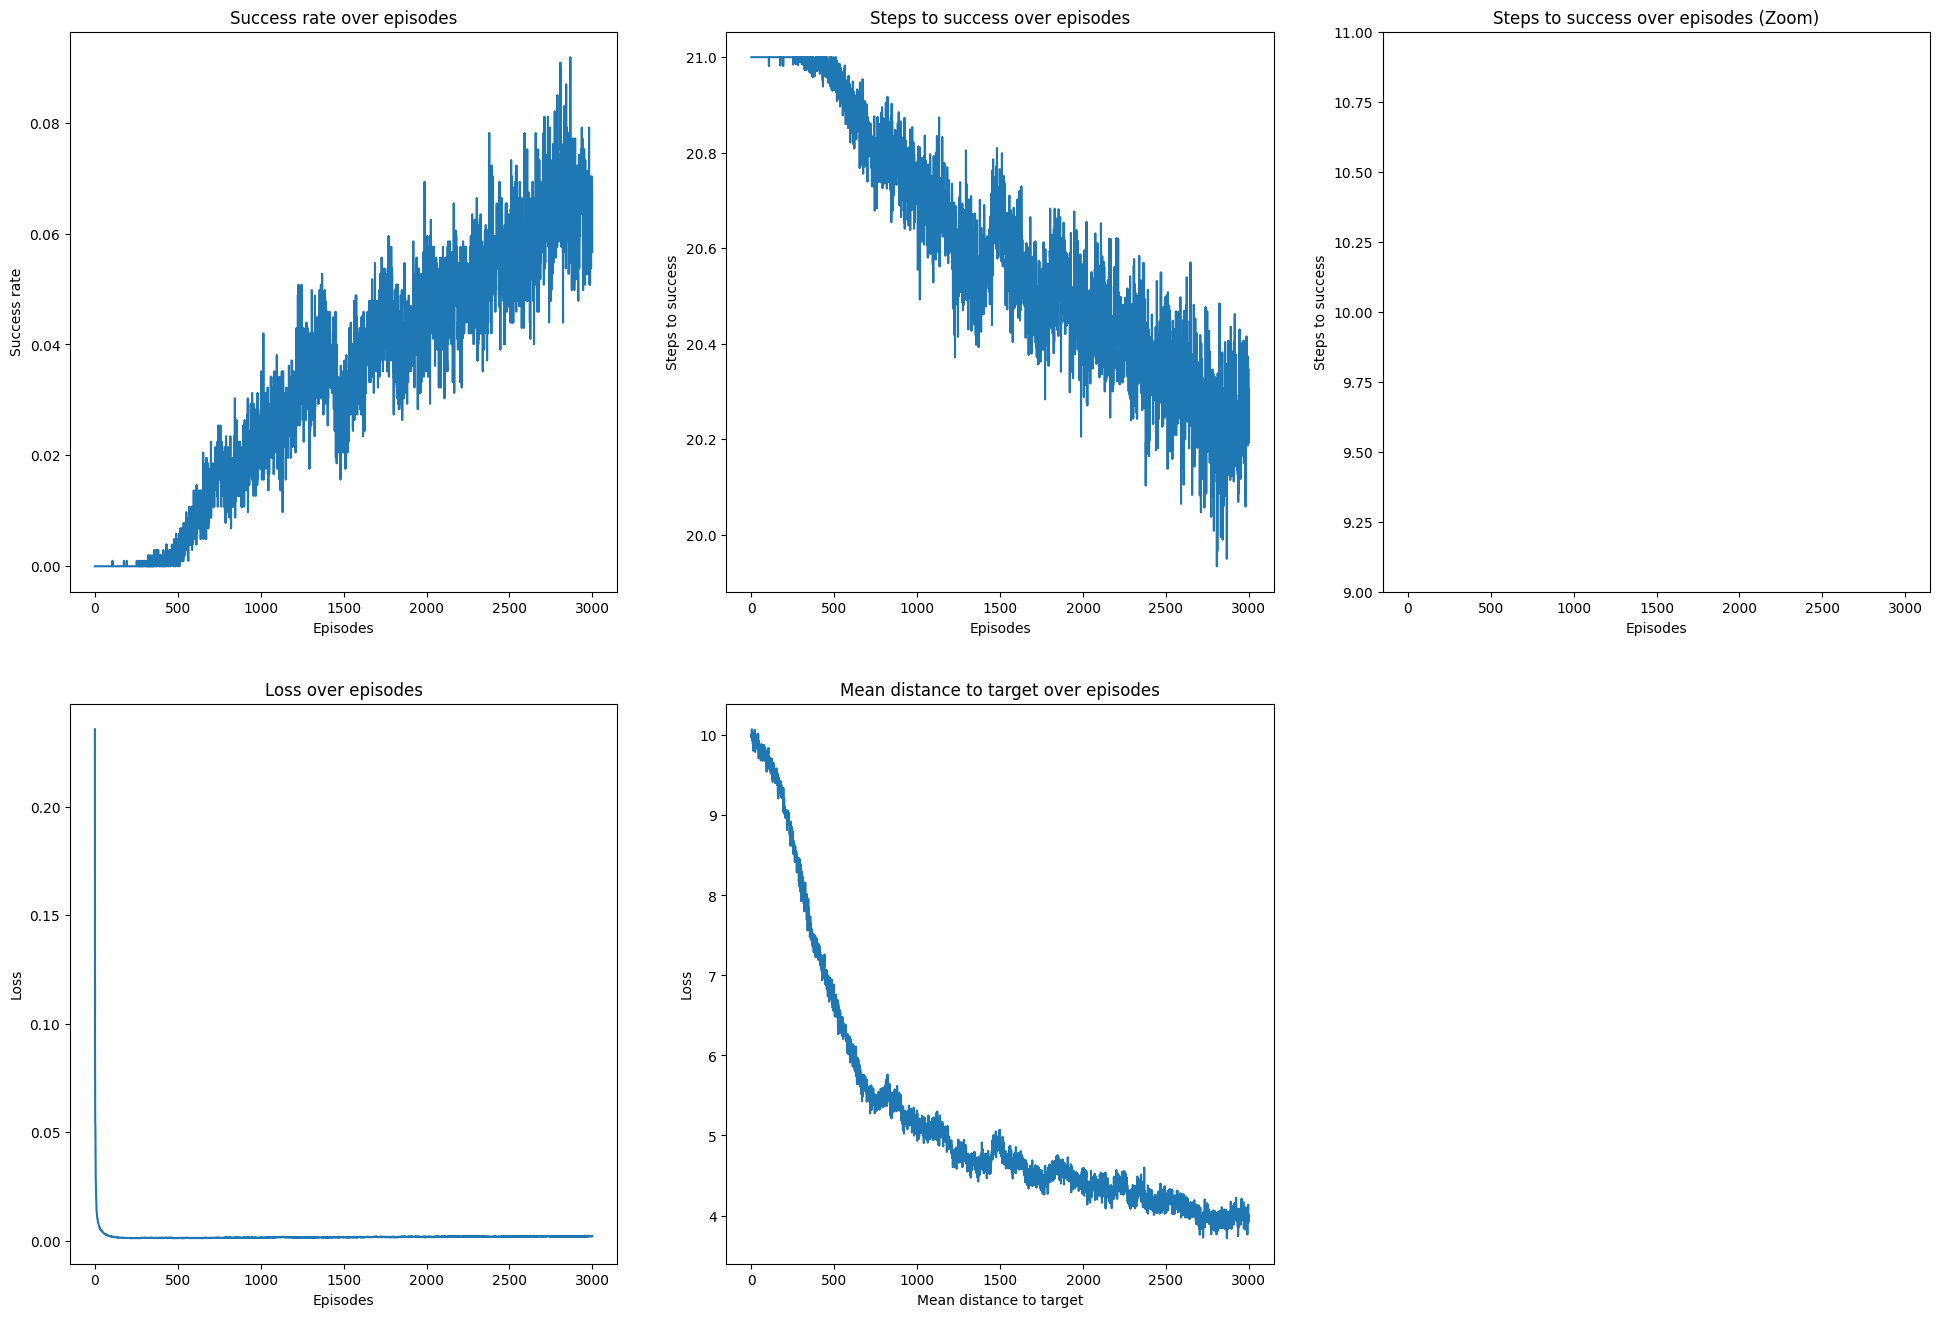

In [5]:
agent, env = train_DQN_agent(20, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=20$, Handcrafted

Initialized FlippingBitSequenceEnvRNGTarget with n = 20
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 100/3000 [00:12<13:52,  3.48it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.25, Avg steps to success: 17.58, Loss: 0.000058


  7%|▋         | 200/3000 [00:38<09:50,  4.74it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.87, Avg steps to success: 11.00, Loss: 0.000036


 10%|█         | 300/3000 [01:02<12:58,  3.47it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 1.00, Avg steps to success: 10.00, Loss: 0.000020


 12%|█▏        | 373/3000 [01:22<09:42,  4.51it/s]

Early stopping at episode 373
Episode: 373/3000, Epsilon: 0.15397952748707622, Success rate: 1.00, Avg steps to success: 9.99, Loss: 0.000003


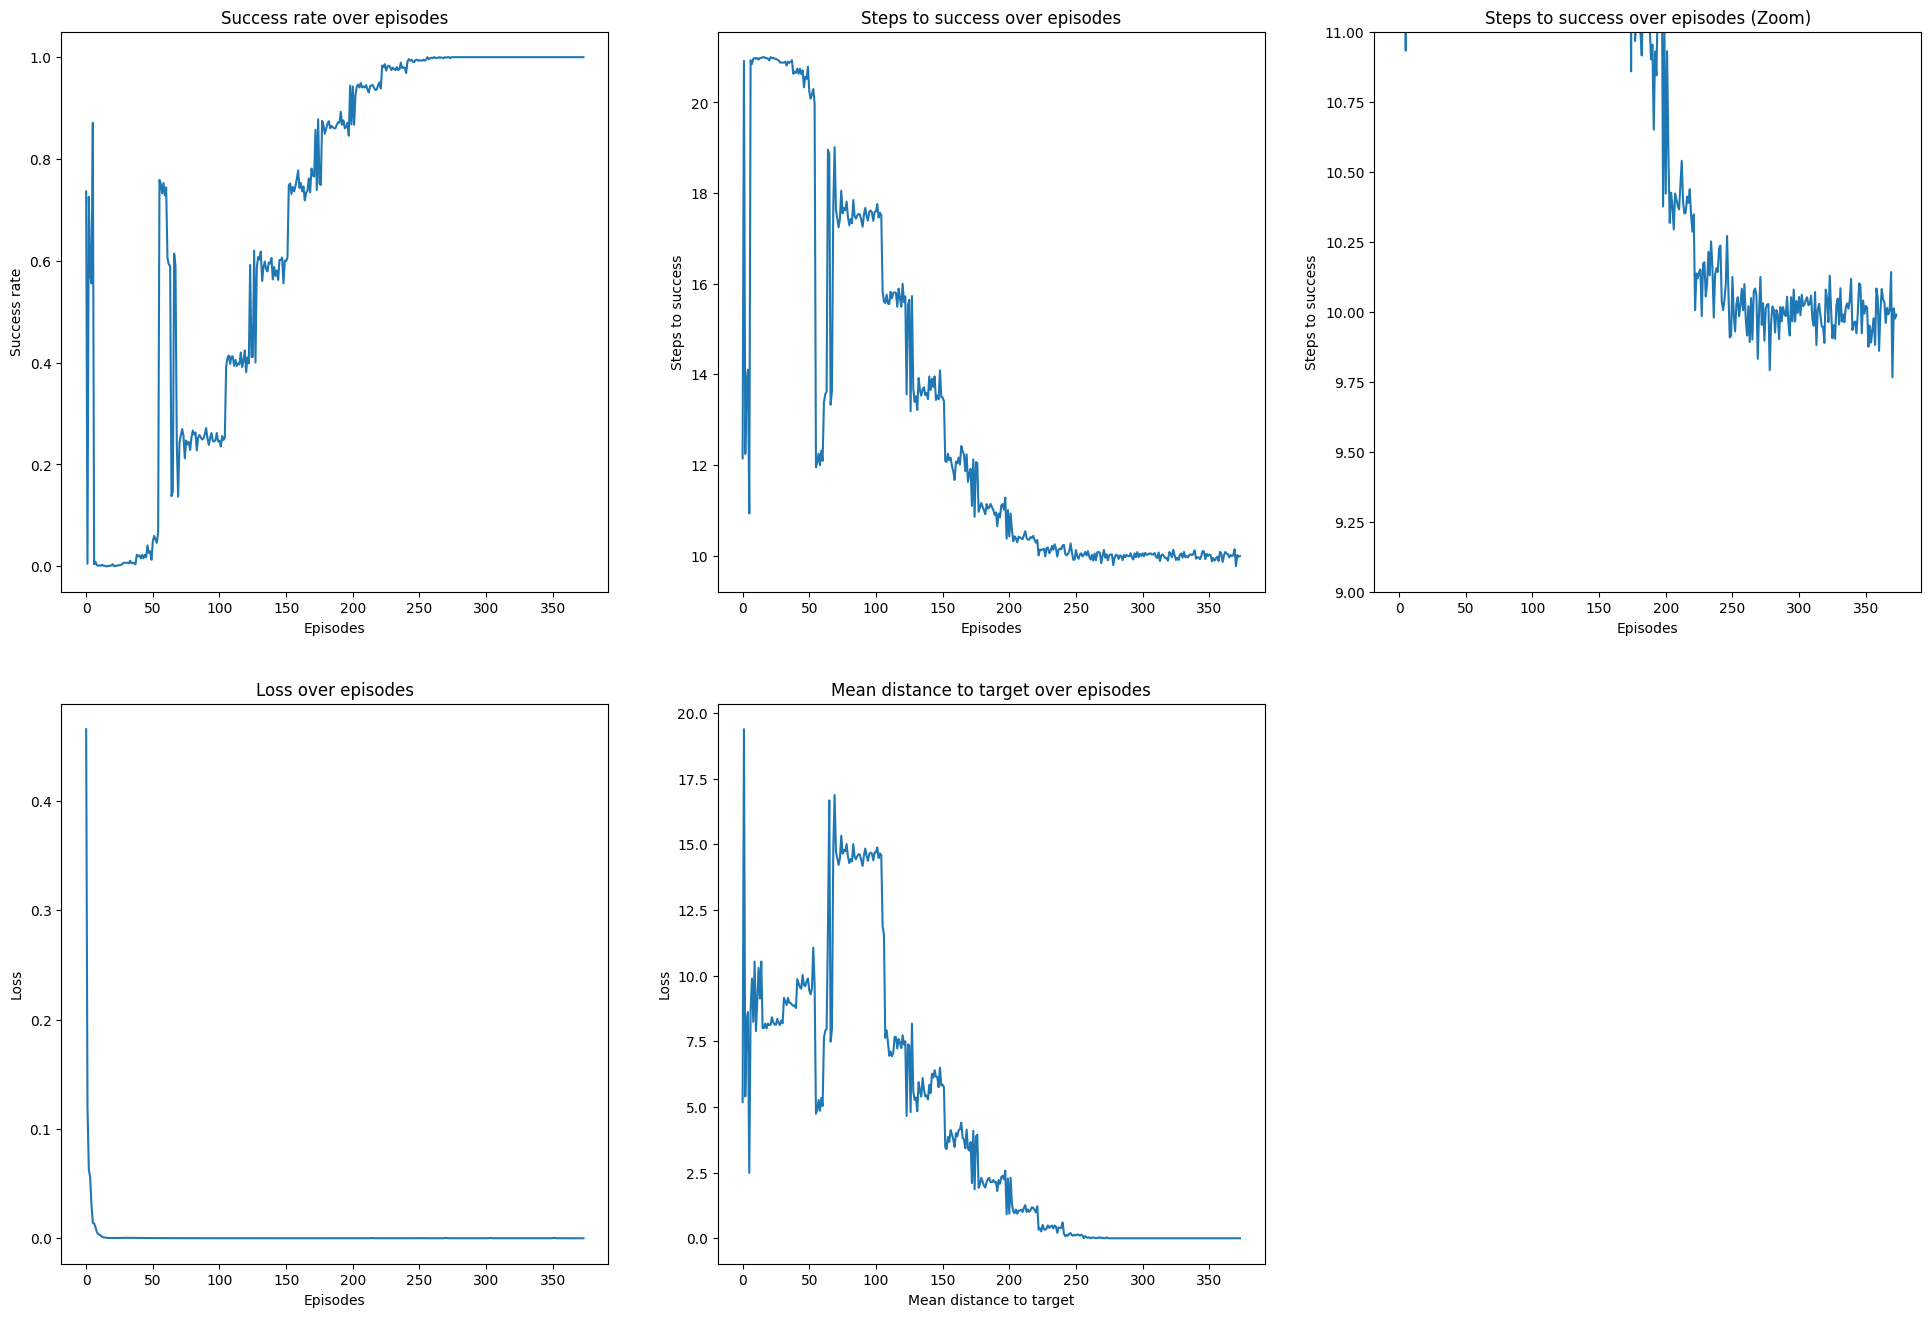

In [6]:
agent, env = train_DQN_agent(20, device=device, episodes=3000, use_HER=True, model_type=runtime.HANDCRAFTED)

### Testing $n=30$, Handcrafted

Initialized FlippingBitSequenceEnvRNGTarget with n = 30
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 100/3000 [00:27<26:38,  1.81it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000097


  7%|▋         | 200/3000 [01:16<18:57,  2.46it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 30.90, Loss: 0.000067


 10%|█         | 300/3000 [01:56<16:36,  2.71it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.18, Avg steps to success: 27.34, Loss: 0.000065


 13%|█▎        | 400/3000 [02:35<17:50,  2.43it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.83, Avg steps to success: 17.03, Loss: 0.000020


 17%|█▋        | 500/3000 [03:15<13:27,  3.10it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 15.03, Loss: 0.000003


 20%|██        | 600/3000 [03:50<12:41,  3.15it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 15.11, Loss: 0.000008


 20%|██        | 613/3000 [03:55<15:16,  2.61it/s]

Early stopping at episode 613
Episode: 613/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 14.94, Loss: 0.000002


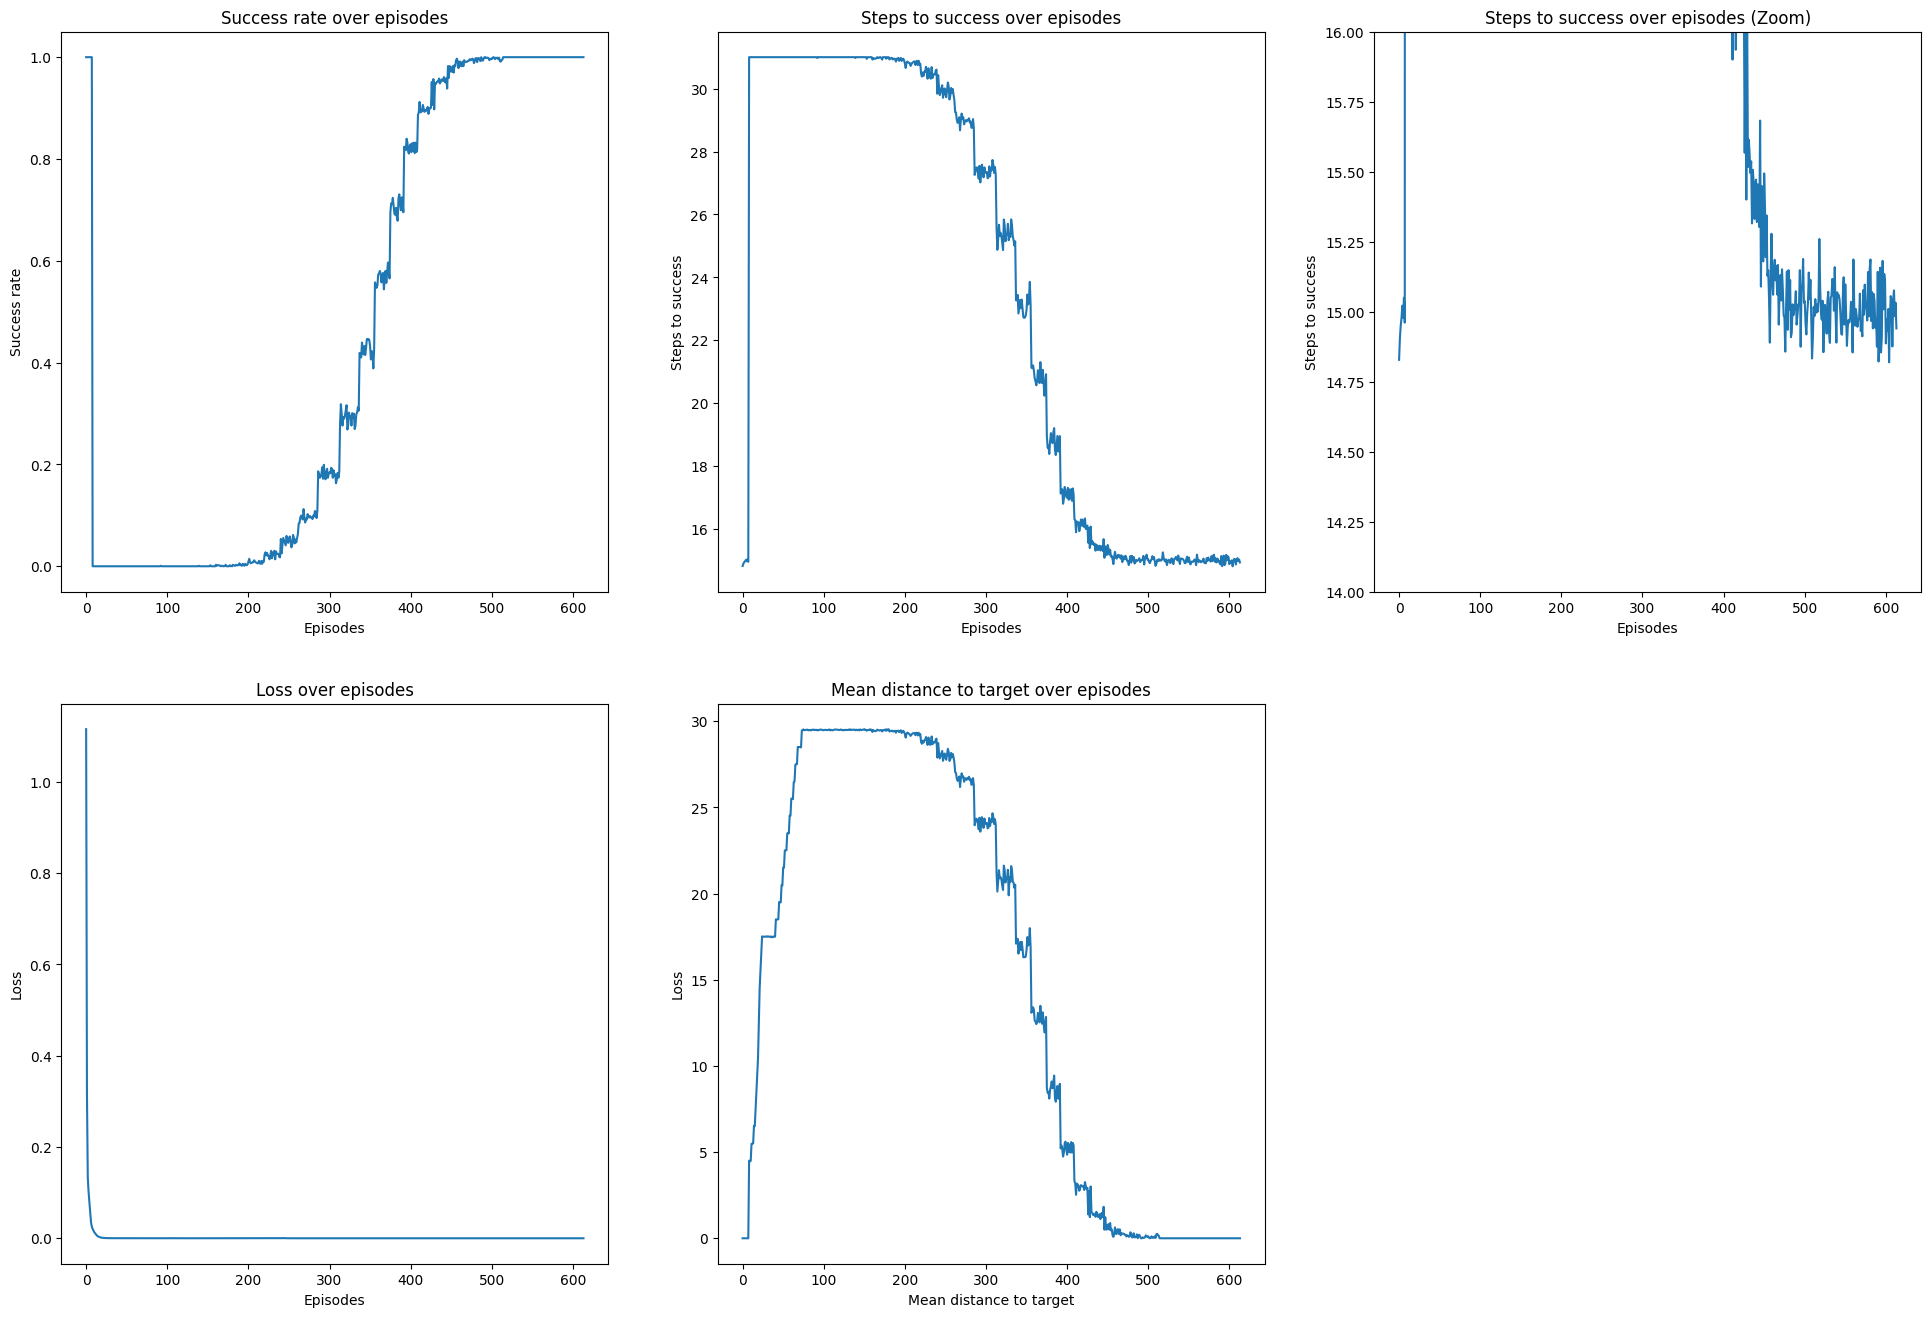

In [7]:
agent, env = train_DQN_agent(30, device=device, episodes=3000, use_HER=True, model_type=runtime.HANDCRAFTED)

### Testing $n=40$, Handcrafted

Initialized FlippingBitSequenceEnvRNGTarget with n = 40
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 100/3000 [00:55<42:46,  1.13it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 41.00, Loss: 0.000003


  7%|▋         | 200/3000 [02:20<45:50,  1.02it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.04, Avg steps to success: 39.98, Loss: 0.000004


 10%|█         | 300/3000 [03:43<32:48,  1.37it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.57, Avg steps to success: 27.81, Loss: 0.000037


 13%|█▎        | 400/3000 [04:56<23:22,  1.85it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.92, Avg steps to success: 21.28, Loss: 0.000003


 17%|█▋        | 500/3000 [05:56<18:28,  2.26it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 19.95, Loss: 0.000001


 20%|██        | 600/3000 [06:53<22:33,  1.77it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 19.98, Loss: 0.000000


 21%|██        | 636/3000 [07:22<27:23,  1.44it/s]

Early stopping at episode 636
Episode: 636/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 19.92, Loss: 0.000003


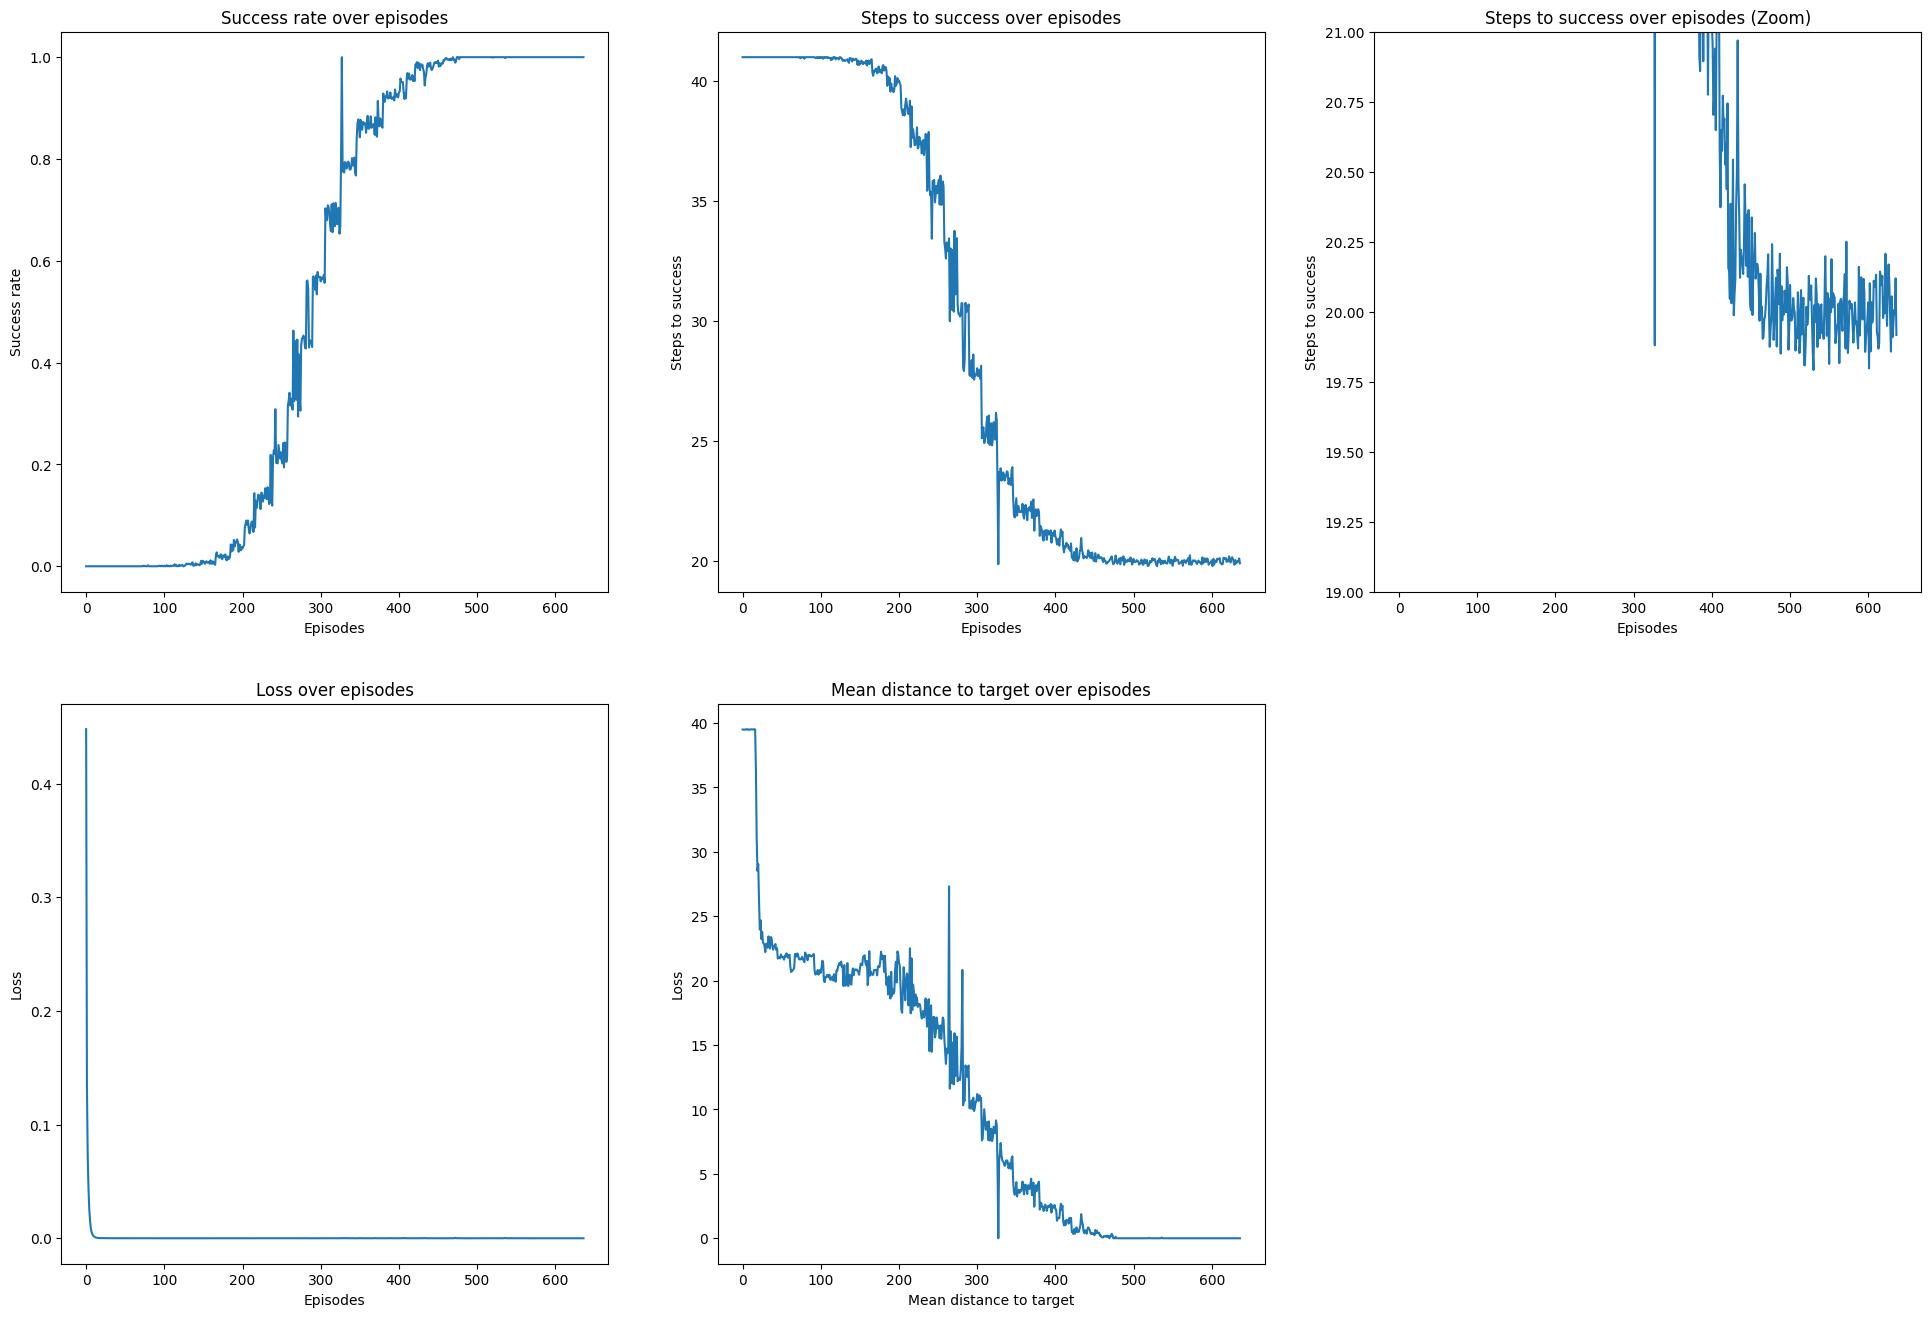

In [8]:
agent, env = train_DQN_agent(40, device=device, episodes=3000, use_HER=True, model_type=runtime.HANDCRAFTED)

### Testing $n=50$, Handcrafted

Initialized FlippingBitSequenceEnvRNGTarget with n = 50
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 100/3000 [00:48<33:06,  1.46it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 51.00, Loss: 0.000011


  7%|▋         | 200/3000 [02:00<34:32,  1.35it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 50.96, Loss: 0.000005


 10%|█         | 300/3000 [03:10<37:17,  1.21it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.10, Avg steps to success: 47.86, Loss: 0.000002


 13%|█▎        | 400/3000 [04:24<33:53,  1.28it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.45, Avg steps to success: 37.80, Loss: 0.000001


 17%|█▋        | 500/3000 [05:37<25:42,  1.62it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.92, Avg steps to success: 26.58, Loss: 0.000002


 20%|██        | 600/3000 [06:41<20:29,  1.95it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 24.93, Loss: 0.000002


 22%|██▏       | 658/3000 [07:15<25:49,  1.51it/s]

Early stopping at episode 658
Episode: 658/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 24.97, Loss: 0.000001


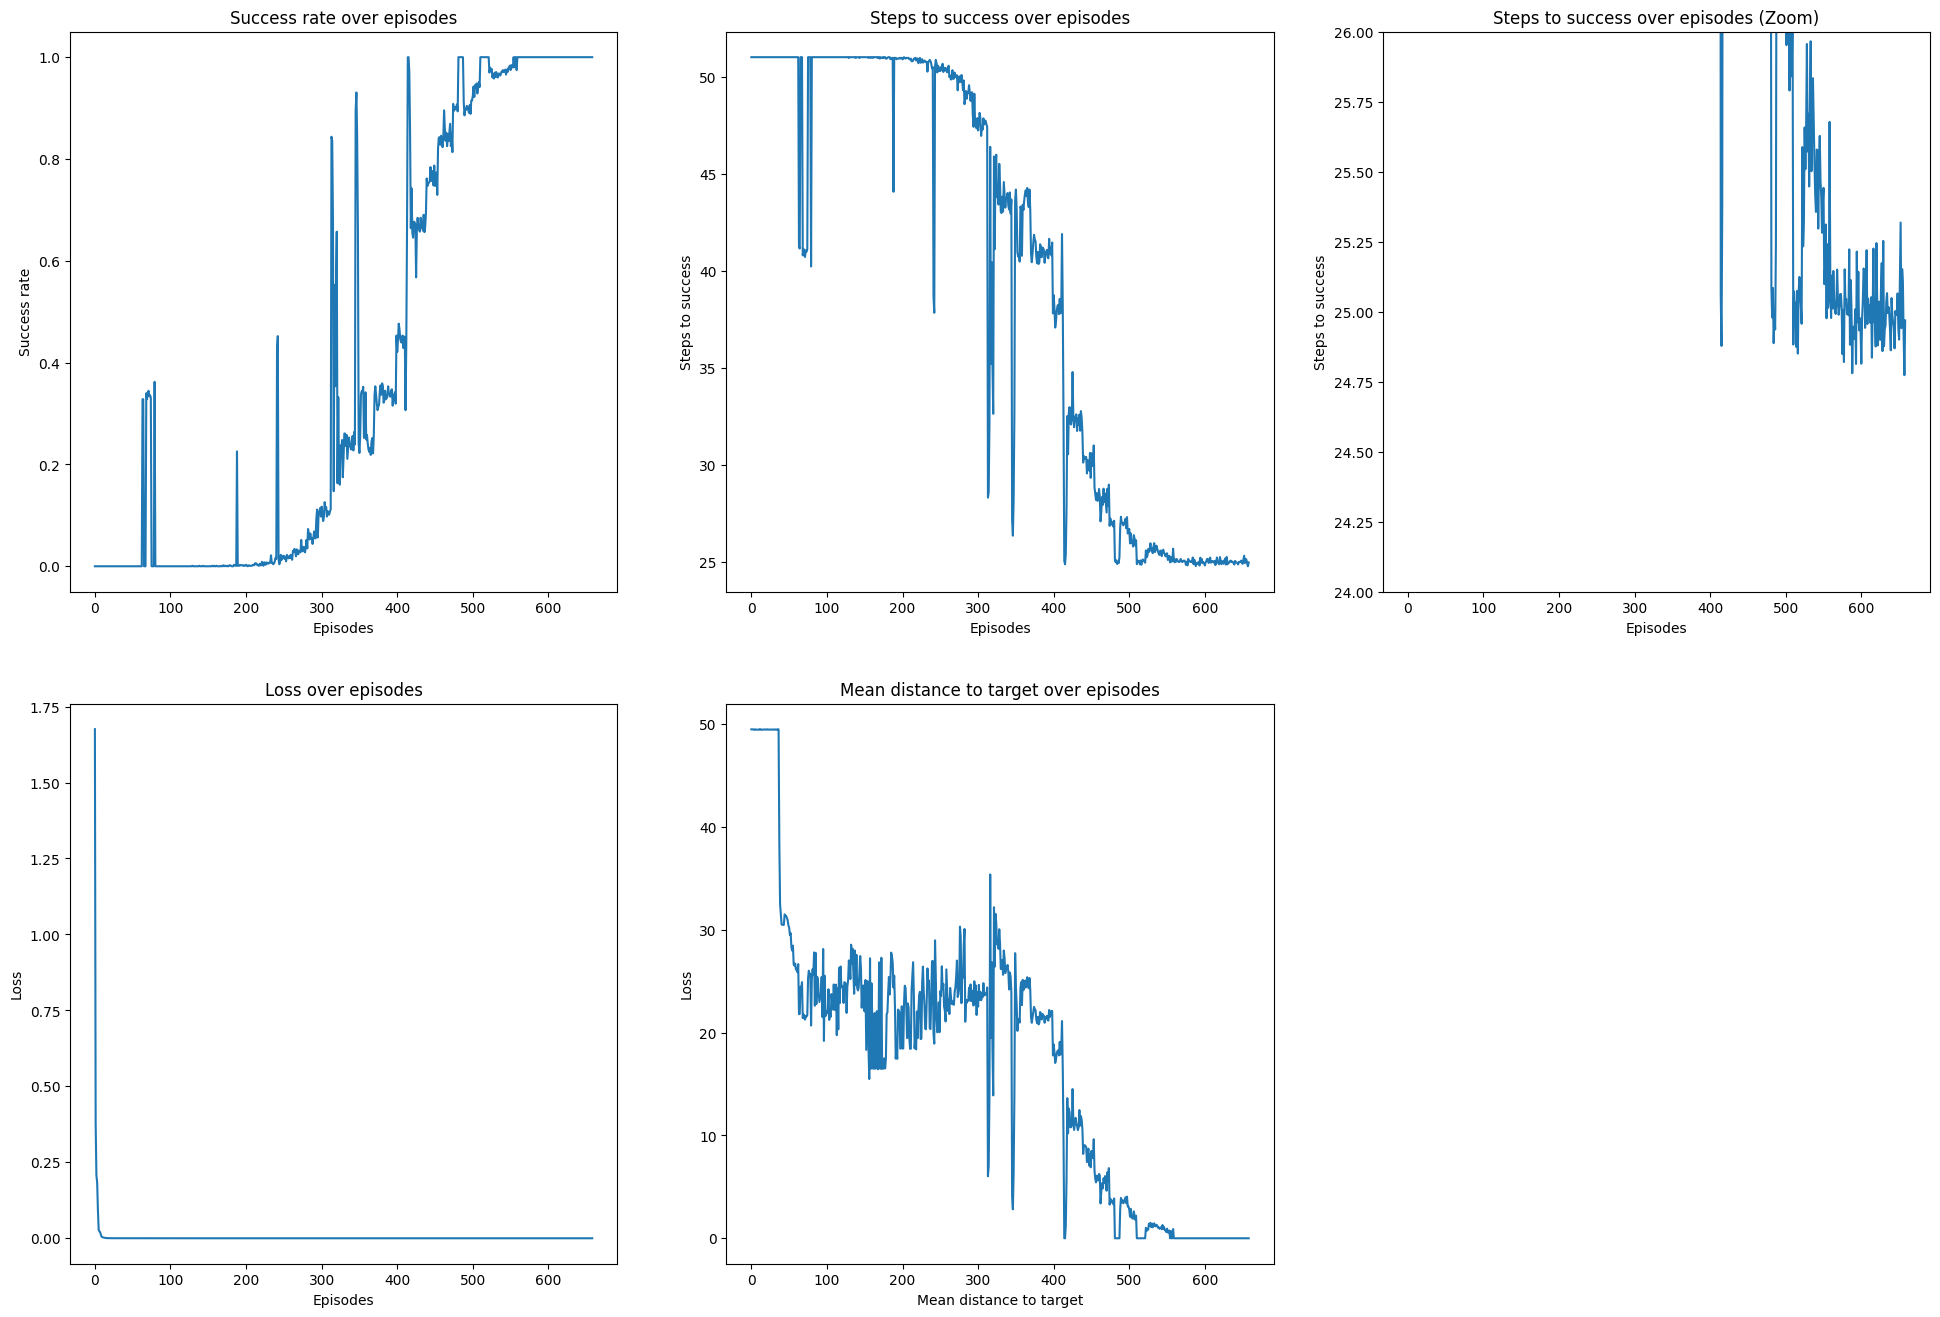

In [9]:
agent, env = train_DQN_agent(50, device=device, episodes=3000, use_HER=True, model_type=runtime.HANDCRAFTED)